In [1]:
from keras.datasets import mnist

In [2]:
    import keras
    from keras.models import Model
    from keras.optimizers import Adadelta
    from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D
    from keras.callbacks import EarlyStopping
    import numpy as np
    import matplotlib.pyplot as plt


In [3]:
    (train_X, train_y), (test_X, test_y) = mnist.load_data()

    # to convert values from 0 to 255 into range 0 to 1.
    train_X = train_X.astype('float32') / 255.
    test_X = test_X.astype('float32') / 255.
    train_X = np.reshape(train_X, (len(train_X), 28, 28, 1)) 
    test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))  
    
    noise_factor = 0.5
    
    #np.random.normal => random means to obtain random samples
    #normal means normal or gaussian distribution, 
    #i.e. random sample from gaussian distribution
    train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
    test_X_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 
    
    # to make values in the range of 0 to 1, 
    #if values < 0 then they will be equal to 0 and 
    #if values > 1 then they will be equal to 1.
    train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
    test_X_noisy = np.clip(test_X_noisy, 0., 1.)


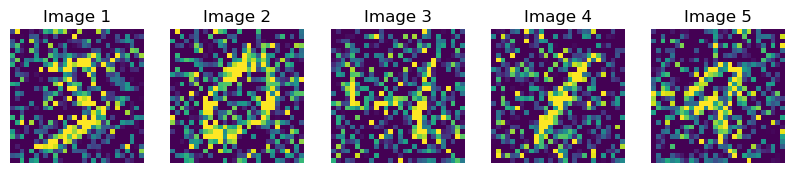

In [14]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 5

# Create a plot with subplots
plt.figure(figsize=(10, 2))

# Loop over the first 5 images
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    # If the images are grayscale (2D)
    if len(train_X_noisy.shape) == 3:
        plt.imshow(train_X_noisy[i], cmap='gray')
    # If the images are RGB (3D)
    else:
        plt.imshow(train_X_noisy[i])
    
    plt.axis('off')  # Hide the axis for better visibility
    plt.title(f"Image {i+1}")

plt.show()

In [4]:
    Input_img = Input(shape=(28, 28, 1))  
    
    #encoding architecture
    x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
    x1 = MaxPool2D( (2, 2), padding='same')(x1)
    x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
    x2 = MaxPool2D( (2, 2), padding='same')(x2)
    x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
    encoded    = MaxPool2D( (2, 2), padding='same')(x3)
    
    # decoding architecture
    x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x3 = UpSampling2D((2, 2))(x3)
    x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
    x2 = UpSampling2D((2, 2))(x2)
    x1 = Conv2D(64, (3, 3), activation='relu')(x2)
    x1 = UpSampling2D((2, 2))(x1)
    decoded   = Conv2D(1, (3, 3), padding='same')(x1)

    autoencoder = Model(Input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [18]:
    early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    a_e = autoencoder.fit(train_X_noisy, train_X,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X_noisy, test_X),
                callbacks=[early_stopper])


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - loss: 2.1096 - val_loss: 2.1359
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 2.1104 - val_loss: 2.1359
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - loss: 2.1092 - val_loss: 2.1359
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - loss: 2.1073 - val_loss: 2.1359
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - loss: 2.1075 - val_loss: 2.1359
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - loss: 2.1038 - val_loss: 2.1359
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - loss: 2.1088 - val_loss: 2.1359
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - loss: 2.1062 - val_loss: 2.1359
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - loss: 2.1049 - val_loss: 2.1359
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - loss: 2.1108 - val_loss: 2.1359
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - loss: 2.1025 - val_loss: 2.1359
Epoch 11: early stopping


In [6]:
    predictions = autoencoder.predict(test_X_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


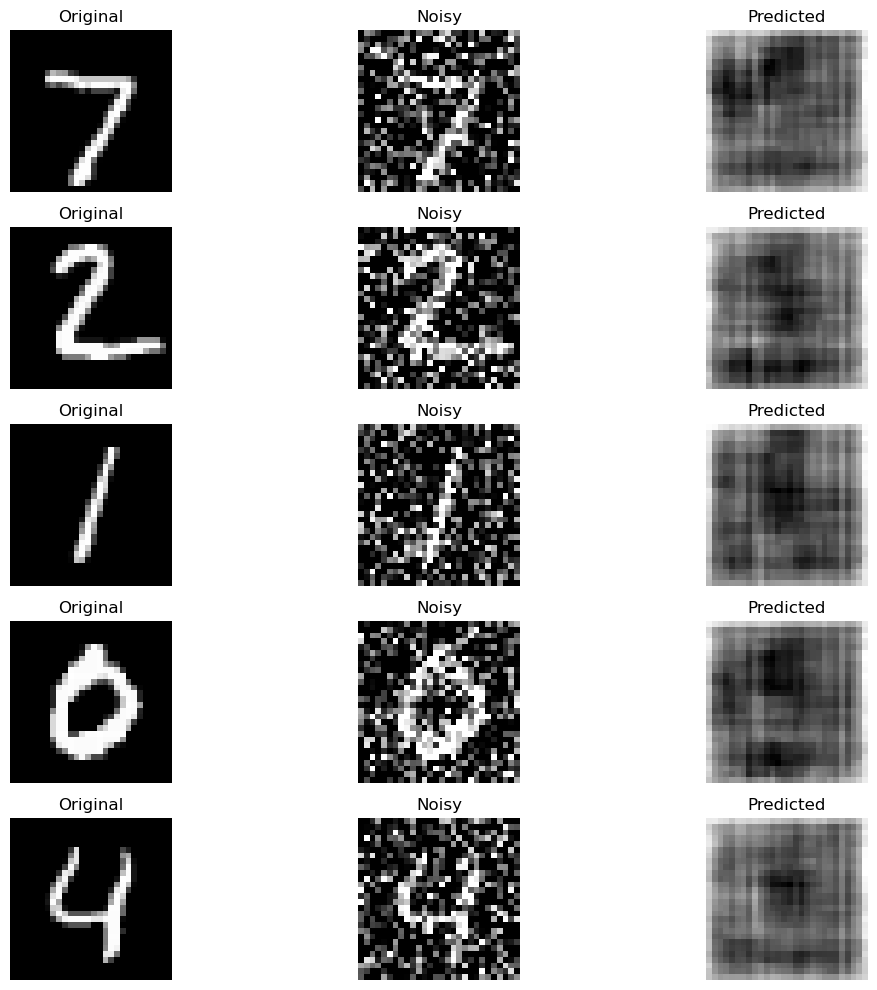

In [16]:
import matplotlib.pyplot as plt

# Get the predictions (decoded images) for the noisy test set
predictions = autoencoder.predict(test_X_noisy)

# Number of images to display
num_images = 5

# Plot the original, noisy, and predicted images
plt.figure(figsize=(12, 10))

for i in range(num_images):
    # Original image
    plt.subplot(num_images, 3, 3*i+1)
    plt.imshow(test_X[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Noisy image
    plt.subplot(num_images, 3, 3*i+2)
    plt.imshow(test_X_noisy[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
    
    # Predicted (decoded) image
    plt.subplot(num_images, 3, 3*i+3)
    plt.imshow(predictions[i], cmap='gray')
    plt.title("Predicted")
    plt.axis('off')

plt.tight_layout()
plt.show()
